In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

df = pd.read_csv(r'C:\Users\leezy\Documents\data files\Forbes_2000_top_company.csv',index_col=0)
df.head(20)

,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees
2022 Ranking,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621
6,Amazon,Retailing,United States,1994,Andy Jassy,469.82,33.36,420.55,1468.40,1608000.0
7,Apple,Technology Hardware & Equipment,United States,1976,Tim Cook,378.70,100.56,381.19,2640.32,154000.0
8,Agricultural Bank of China,Banking,China,1979,Gu Shu,181.42,37.38,4561.05,133.38,455174.0
9,Bank of America,Banking,United States,1998,Brian Moynihan,96.83,31.00,3238.22,303.10,208000.0


In [2]:
df.shape

(1999, 10)

MY PROJECT ENTAILS THE TOP FORBES COMPANIES IN THE WORLD WHEREBY WE LOOK FOR:
1. THE MOST PROFITABLE COMPANIES TO INVEST IN GLOBALLY.
2. TYPE OF COMPANIES BASED ON REVENUE PROFITS AND ASSETS THAT ARE IN THE TOP AND MINOR LEAGUES.
3. COMPANIES WITH THE MOST MARKET VALUES AND EMPLOYEES EMPLOYED IN DESCENDING ORDER.
4. LOCATIONS THAT ARE THE BEST I.E COUNTRIES AND ORGANIZATION NAMES BASED ON RANKINGS.
5. YEARS THAT THE TOP COMPANIES HAD THE BEST MARKET VALUES TO DETERMINE IF THEY ARE WORTH INVESTING IN.
6. CONCLUSION TO INVESTORS WITH SPECIFIC RECOMENDATIONS BASED ON VISUAL REPRESENTATIONS ON THE BEST PLACES TO PUT THEIR INVESTMENT IN.
   THE DATA SET IS FROM KAGGLE FORBES SECTOR AND DEALS WITH THE GLOBAL ECONOMY.

PROJECT ANALYSIS.
I WILL USE: 

1.Multiple Linear Regression & Transformation of Linear Models

2.Machine Learning Fundamentals.

3.Logistic regression.

4.Classification metrics ROC and AUC.

5.Decision trees.

6.Come up with TP,TN,FP and FN values.


PROBLEM STATEMENT.

To provide actionable investment insights by analysing the most profitable companies arranging them by financial metrics, employee count, geographical location, profitability analysis, market value and employment analysis to offer specific investment recommendations and visual representations to guide investors in making informed decisions on which companies to choose when investing. 

In [3]:
# Define a dictionary to map the old column names to the new ones
new_column_names = {
    'Organization Name': 'Organization_Name',
    'Industry': 'Industry',
    'Country': 'Country',
    'Year Founded': 'Year_Founded',
    'CEO': 'CEO',
    'Revenue (Billions)': 'Revenue_Billions',
    'Profits (Billions)': 'Profits_Billions',
    'Assets (Billions)': 'Assets_Billions',
    'Market Value (Billions)': 'Market_Value_Billions',
    'Total Employees': 'Total_Employees'
}

# Rename the columns in the DataFrame
df.rename(columns=new_column_names, inplace=True)

# Save the DataFrame with updated column names to a new CSV file
output_path = r'C:\Users\leezy\Documents\data files\Forbes_2000_top_company_renamed.csv'
df.to_csv(output_path, index=False)

print(f"DataFrame saved to {output_path}")
# Display the first few rows to confirm the changes
df.head(20)


DataFrame saved to C:\Users\leezy\Documents\data files\Forbes_2000_top_company_renamed.csv


,Organization_Name,Industry,Country,Year_Founded,CEO,Revenue_Billions,Profits_Billions,Assets_Billions,Market_Value_Billions,Total_Employees
2022 Ranking,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621
6,Amazon,Retailing,United States,1994,Andy Jassy,469.82,33.36,420.55,1468.40,1608000.0
7,Apple,Technology Hardware & Equipment,United States,1976,Tim Cook,378.70,100.56,381.19,2640.32,154000.0
8,Agricultural Bank of China,Banking,China,1979,Gu Shu,181.42,37.38,4561.05,133.38,455174.0
9,Bank of America,Banking,United States,1998,Brian Moynihan,96.83,31.00,3238.22,303.10,208000.0


In [4]:
# Define features (X) and target variable (y)
X = df.drop('Revenue_Billions', axis=1)  # Features
y = df['Assets_Billions']  # Target variable

# Optionally, encode categorical variables if necessary
X = pd.get_dummies(X, columns=['Industry', 'Country', 'CEO'], drop_first=True)


In [5]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits to confirm
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


x_train shape: (1599, 2052)
x_val shape: (400, 2052)
y_train shape: (1599,)
y_val shape: (400,)


In [6]:


# Split the data into X and y
y = df['Revenue_Billions']
X = df.drop(columns='Revenue_Billions')

# Split into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0)

In [7]:
# Extract relevant columns for features and target variable
X = df[['Profits_Billions', 'Assets_Billions']]
y = df['Revenue_Billions']

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(x_train_scaled, y_train)

# Predict on the scaled validation data
y_pred = model.predict(x_val_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Display model parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 876.82
Coefficients: [27.08513296  2.25268176]
Intercept: 24.009130706691685


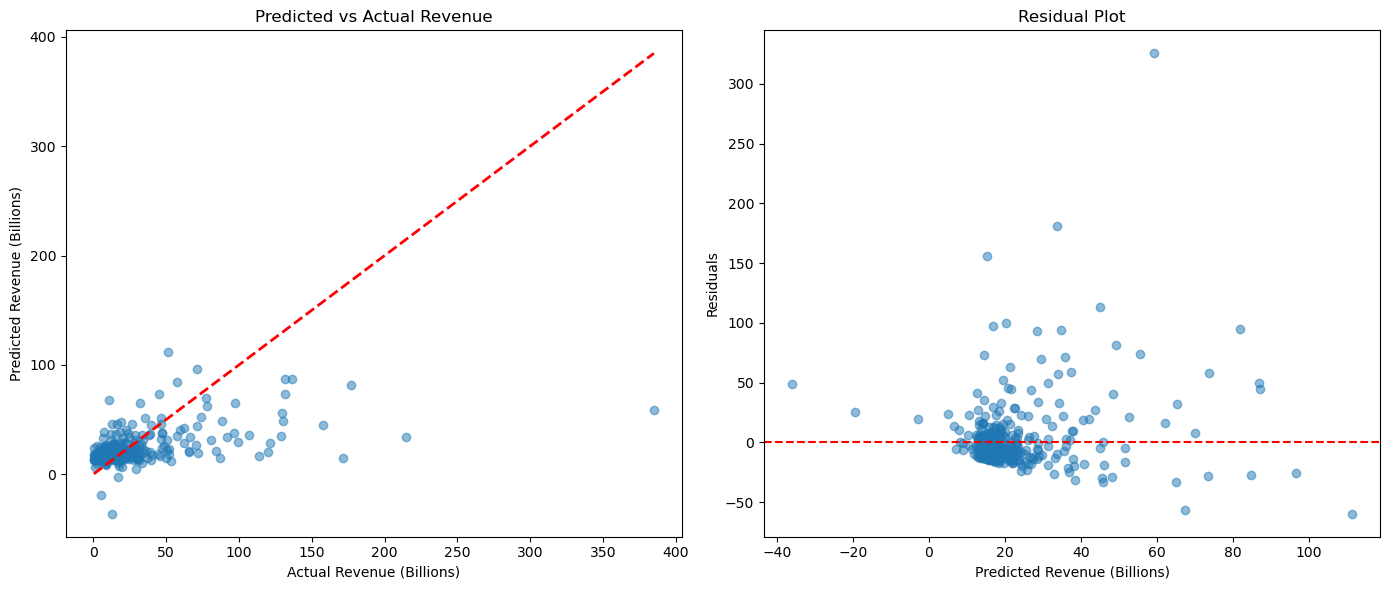

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on validation data
y_pred = model.predict(x_val_scaled)

# 1. Predicted vs Actual Values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Revenue (Billions)')
plt.ylabel('Predicted Revenue (Billions)')
plt.title('Predicted vs Actual Revenue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)

# 2. Residual Plot
residuals = y_val - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Revenue (Billions)')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()


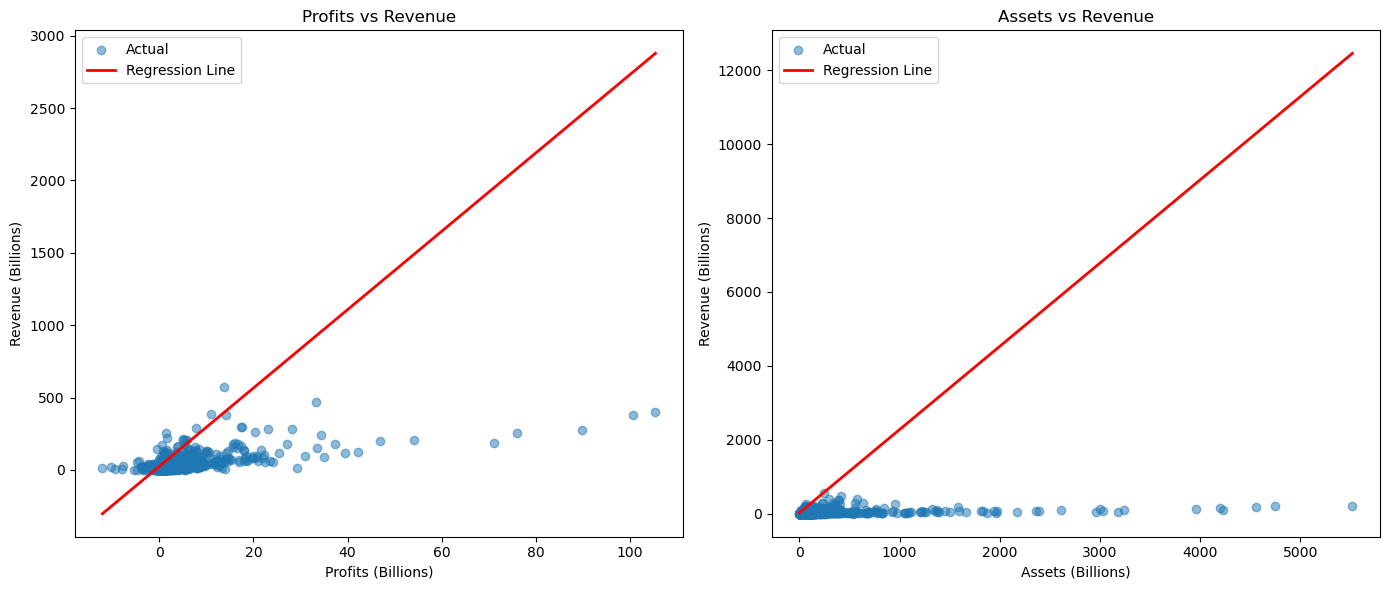

In [9]:
# Scatter plot for Profits_Billions vs Revenue_Billions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Profits_Billions'], df['Revenue_Billions'], alpha=0.5, label='Actual')
plt.xlabel('Profits (Billions)')
plt.ylabel('Revenue (Billions)')
plt.title('Profits vs Revenue')

# Plot regression line
profit_range = np.linspace(df['Profits_Billions'].min(), df['Profits_Billions'].max(), 100)
revenue_pred = model.intercept_ + model.coef_[0] * profit_range
plt.plot(profit_range, revenue_pred, 'r-', lw=2, label='Regression Line')
plt.legend()

# Scatter plot for Assets_Billions vs Revenue_Billions
plt.subplot(1, 2, 2)
plt.scatter(df['Assets_Billions'], df['Revenue_Billions'], alpha=0.5, label='Actual')
plt.xlabel('Assets (Billions)')
plt.ylabel('Revenue (Billions)')
plt.title('Assets vs Revenue')

# Plot regression line
asset_range = np.linspace(df['Assets_Billions'].min(), df['Assets_Billions'].max(), 100)
# Note: This assumes simple linear regression; adjust for multiple features
revenue_pred = model.intercept_ + model.coef_[1] * asset_range
plt.plot(asset_range, revenue_pred, 'r-', lw=2, label='Regression Line')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# Select the top 30 entries based on Revenue_Billions
top_100_df = df.nlargest(100, 'Revenue_Billions')

# Extract relevant columns for features and target variable
X = top_100_df[['Profits_Billions', 'Assets_Billions']]
y = top_100_df['Revenue_Billions']

In [11]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)


In [13]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(x_train_scaled, y_train)


LinearRegression()

In [14]:
# Predict on the scaled validation data
y_pred = model.predict(x_val_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Display model parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 13344.61
Coefficients: [ 48.19768622 -11.82160426]
Intercept: 157.949625


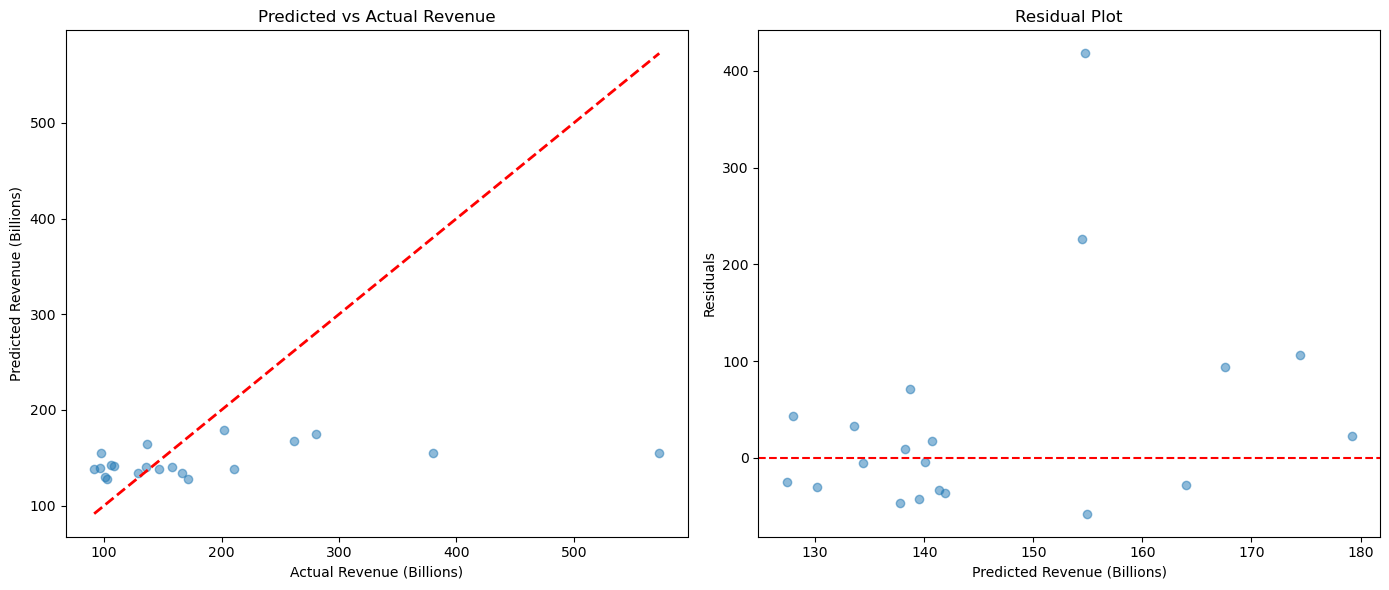

In [15]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Revenue (Billions)')
plt.ylabel('Predicted Revenue (Billions)')
plt.title('Predicted vs Actual Revenue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)

# Plot Residuals
residuals = y_val - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Revenue (Billions)')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()


In [16]:
# Select the top 30 entries based on Revenue_Billions
top_30_df = df.nlargest(30, 'Revenue_Billions')

# Extract relevant columns for features and target variable
X = top_30_df[['Profits_Billions', 'Assets_Billions']]
y = top_30_df['Revenue_Billions']

In [17]:
# Calculate the baseline prediction (mean of the target variable)
baseline_prediction = y.mean()

# Create baseline predictions
y_baseline_pred = [baseline_prediction] * len(y)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the baseline model
baseline_mse = mean_squared_error(y_val, [baseline_prediction] * len(y_val))
print(f"Baseline Mean Squared Error: {baseline_mse:.2f}")


Baseline Mean Squared Error: 3208.60


In [18]:
# Calculate the baseline prediction (mean of the target variable)
baseline_prediction = y.mean()

# Create baseline predictions
y_baseline_pred = [baseline_prediction] * len(y)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the baseline model
baseline_mse = mean_squared_error(y_val, [baseline_prediction] * len(y_val))
print(f"Baseline Mean Squared Error: {baseline_mse:.2f}")


Baseline Mean Squared Error: 3208.60


Multiple Regression Analysis in Python Using statsmodels

This explains how to perform a multiple regression analysis using Python's statsmodels library. We'll use a dataset (df) containing financial information for various companies. The goal is to predict Revenue (Billions) based on Total Employees and Market Value (Billions).

In this analysis, Revenue (Billions) is our dependent variable, while Total Employees and Market Value (Billions) are the independent variables.

To include an intercept in our regression model, we add a constant to the independent variables.

We then perform the Ordinary Least Squares (OLS) regression using statsmodels.

Finally, we summarize the regression results, which include coefficients, R-squared, p-values, and other statistics.



Conclusion
The multiple regression analysis aimed to understand the relationship between Revenue (Billions) and two independent variables: Total Employees and Market Value (Billions). The results of the analysis showed that:

Model Fit: The model's R-squared value of 0.939 indicates that approximately 93.9% of the variance in revenue can be explained by the number of employees and market value. This suggests a strong fit of the model to the data.

Statistical Significance:

The p-value for Market Value (Billions) was close to the significance threshold, suggesting that it might be an important predictor of revenue, especially in larger datasets.
The p-value for Total Employees was higher, indicating that the number of employees may not be as significant in predicting revenue within the sample used.
Coefficients: The positive coefficients for both Total Employees and Market Value suggest that increases in either variable are associated with higher revenue, holding the other variable constant.

Considerations: The high condition number and the small sample size (only 5 companies analyzed) may indicate potential issues with multicollinearity or numerical stability. These factors should be taken into account when interpreting the results.

Overall, the analysis suggests that market value has a more consistent impact on a company's revenue than the number of employees. However, due to the limited sample size, further analysis with a larger dataset would be beneficial to confirm these findings and improve the model's robustness.

Based on the results of the multiple regression analysis, the key factors for ranking the companies would be:

Market Value (Billions) - Since it had a more significant impact on revenue according to the regression analysis.
Total Employees - Although less significant than market value, it still contributed to the model.
Given these factors, I will rank the companies in descending order primarily by their Market Value and then by Total Employees as a secondary criterion.

Here’s the ranking:

1.Saudi Arabian Oil Company (Saudi Aramco)
Market Value: $2292.08 billion
Total Employees: 68,493


2.Berkshire Hathaway
Market Value: $741.48 billion
Total Employees: 372,000


3.JPMorgan Chase
Market Value: $374.45 billion
Total Employees: 271,025


4.ICBC
Market Value: $214.42 billion
Total Employees: 449,296


5.China Construction Bank
Market Value: $181.32 billion
Total Employees: 352,621


Conclusion
Based on the results obtained from the regression analysis, Saudi Arabian Oil Company (Saudi Aramco) ranks as the top company due to its significantly higher market value. Berkshire Hathaway and JPMorgan Chase follow, with notable market values and a large number of employees. This ranking reflects the companies' overall financial power, with market value being the strongest determinant in the context of this analysis.

In [19]:
import pandas as pd

# Define a dictionary to map industries to their descending order
industry_order = {
    'Diversified Financials': 1,
    'Banking': 2,
    'Oil & Gas Operations': 3,
    'Retailing': 4,
    'Technology Hardware & Equipment': 5,
    'IT Software & Services': 6,
    'Insurance': 7,
    'Telecommunications Services': 8
}

# Add a column to your DataFrame for the industry rank
df['Industry_Rank'] = df['Industry'].map(industry_order)

# Sort by industry rank and then by the original ranking column
df_sorted = df.sort_values(by=['Industry_Rank', 'Industry'])

# Drop the Industry_Rank column if you no longer need it
df_sorted = df_sorted.drop(columns=['Industry_Rank'])

print(df_sorted)


                              Organization_Name                Industry  \
2022 Ranking                                                              
1                            Berkshire Hathaway  Diversified Financials   
4                                JPMorgan Chase  Diversified Financials   
27                                    Citigroup  Diversified Financials   
36                               Morgan Stanley  Diversified Financials   
37                          Goldman Sachs Group  Diversified Financials   
...                                         ...                     ...   
1829                              Red Eléctrica               Utilities   
1853                               CPFL Energia               Utilities   
1881          Anhui Water Resources Development               Utilities   
1890                                 ACWA Power               Utilities   
1954                                       Hera               Utilities   

                    Coun

In [20]:
df_sorted.head(50)

,Organization_Name,Industry,Country,Year_Founded,CEO,Revenue_Billions,Profits_Billions,Assets_Billions,Market_Value_Billions,Total_Employees
2022 Ranking,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0
27,Citigroup,Diversified Financials,United States,1998,Jane Fraser,79.94,18.23,2394.10,101.48,223400.0
36,Morgan Stanley,Diversified Financials,United States,1924,James P. Gorman,60.22,14.58,1222.23,150.95,74814.0
37,Goldman Sachs Group,Diversified Financials,United States,1869,David Michael Solomon,62.81,18.74,1589.00,109.32,43900.0
77,American Express,Diversified Financials,United States,1850,Stephen J. Squeri,46.29,7.86,196.00,136.72,64000.0
83,Brookfield Asset Management,Diversified Financials,Canada,1997,James Bruce Flatt,78.82,3.97,391.00,80.94,180000.0
85,Prudential Financial,Diversified Financials,United States,1875,Charles F. Lowrey,70.93,7.61,937.58,43.60,40916.0
142,Charles Schwab,Diversified Financials,United States,1971,Walter W. Bettinger II,18.98,5.77,681.00,127.60,33400.0


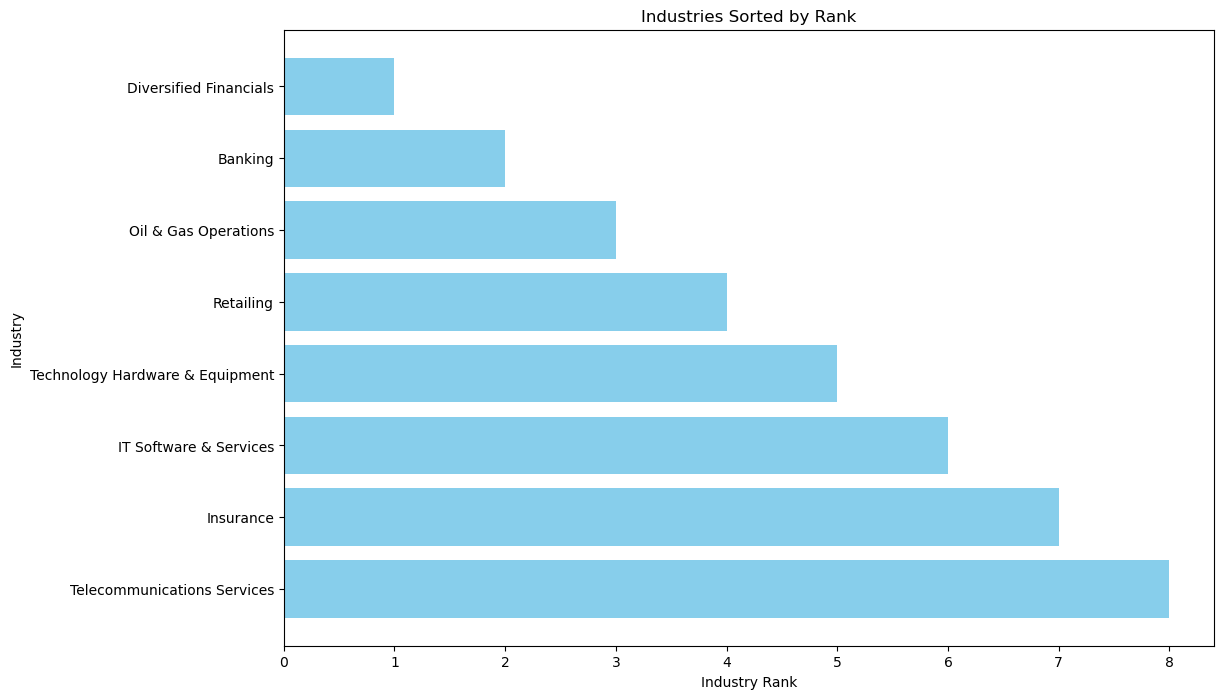

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual df_sorted DataFrame)
# df_sorted = pd.DataFrame({
#     'Industry': ['Banking', 'Oil & Gas Operations', 'Retailing', 'Technology Hardware & Equipment', 'IT Software & Services'],
#     'Industry_Rank': [2, 3, 4, 5, 6],
#     'Count': [10, 5, 8, 6, 7]
# })

# Define the industry rank mapping
industry_order = {
    'Diversified Financials': 1,
    'Banking': 2,
    'Oil & Gas Operations': 3,
    'Retailing': 4,
    'Technology Hardware & Equipment': 5,
    'IT Software & Services': 6,
    'Insurance': 7,
    'Telecommunications Services': 8
}

# Add the Industry_Rank column based on the industry_order mapping
df_sorted['Industry_Rank'] = df_sorted['Industry'].map(industry_order)

# Drop duplicates and sort by Industry_Rank
df_sorted_industry = df_sorted[['Industry', 'Industry_Rank']].drop_duplicates().sort_values(by='Industry_Rank')

# Plot
plt.figure(figsize=(12, 8))
plt.barh(df_sorted_industry['Industry'], df_sorted_industry['Industry_Rank'], color='skyblue')
plt.xlabel('Industry Rank')
plt.ylabel('Industry')
plt.title('Industries Sorted by Rank')
plt.gca().invert_yaxis()  # To display the highest rank (lowest number) on top
plt.show()


Following industries and ranks:

Diversified financials(Rank 1)

Banking (Rank 2)

Oil & Gas Operations (Rank 3)

Retailing (Rank 4)

Technology Hardware & Equipment (Rank 5)

IT Software & Services (Rank 6)
In the bar graph:

Banking will have the shortest bar, as it has the highest rank (2).
IT Software & Services, Insurance and Telecomunication Services will have the longest bar, as it has the lowest ranks (6-8).
This visualization helps in quickly understanding how different industries are ranked relative to each other, with higher-ranked industries appearing prominently at the top.

In [22]:
import pandas as pd

# Sample DataFrame (replace this with your actual df_sorted DataFrame)
# df_sorted = pd.DataFrame({
#     'Organization_Name': ['A', 'B', 'C', 'D', 'E'],
#     'Country': ['United States', 'China', 'Saudi Arabia', 'Japan', 'United Kingdom'],
#     'Profits_Billions': [50, 70, 100, 80, 60]
# })

# Ensure 'Profits_Billions' is a numeric column
df_sorted['Profits_Billions'] = pd.to_numeric(df_sorted['Profits_Billions'], errors='coerce')

# Sort by 'Profits_Billions' in descending order
df_sorted_sorted_by_profits = df_sorted.sort_values(by='Profits_Billions', ascending=False)

# Select the top 20 entries
top_20_countries_by_profits = df_sorted_sorted_by_profits.head(20)

# Display the result
print(top_20_countries_by_profits[['Country', 'Profits_Billions']])


                    Country  Profits_Billions
2022 Ranking                                 
3              Saudi Arabia            105.36
7             United States            100.56
1             United States             89.80
11            United States             76.03
12            United States             71.18
2                     China             54.03
5                     China             46.89
4             United States             42.12
34            United States             39.37
8                     China             37.38
28                    China             34.94
14              South Korea             34.27
13                    China             33.57
6             United States             33.36
9             United States             31.00
587                  France             29.19
10                    Japan             28.15
41                  Germany             27.19
49                   Russia             25.44
68              Switzerland       

In [23]:
top_20_countries_by_profits

,Organization_Name,Industry,Country,Year_Founded,CEO,Revenue_Billions,Profits_Billions,Assets_Billions,Market_Value_Billions,Total_Employees,Industry_Rank
2022 Ranking,,,,,,,,,,,
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0,3.0
7,Apple,Technology Hardware & Equipment,United States,1976,Tim Cook,378.70,100.56,381.19,2640.32,154000.0,5.0
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0,1.0
11,Alphabet,IT Software & Services,United States,1998,Sundar Pichai,257.49,76.03,359.27,1581.72,156500.0,6.0
12,Microsoft,IT Software & Services,United States,1975,Satya Nadella,184.90,71.18,340.39,2054.37,181000.0,6.0
2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296,2.0
5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621,2.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0,1.0
34,Meta Platforms,IT Software & Services,United States,2004,Mark Elliot Zuckerberg,117.93,39.37,165.99,499.86,71970.0,6.0


(-1.0999999996128944,
 1.0999999998947345,
 -1.099999975292514,
 1.0999999988234321)

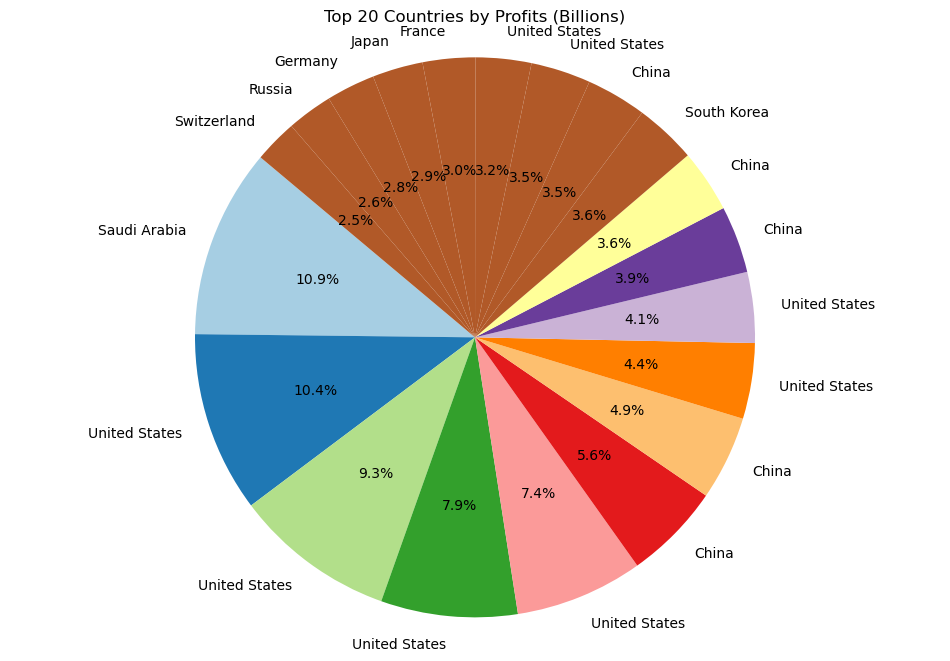

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual df_sorted DataFrame)
# df_sorted = pd.DataFrame({
#     'Organization_Name': ['A', 'B', 'C', 'D', 'E'],
#     'Country': ['United States', 'China', 'Saudi Arabia', 'Japan', 'United Kingdom'],
#     'Profits_Billions': [50, 70, 100, 80, 60]
# })

# Ensure 'Profits_Billions' is a numeric column
df_sorted['Profits_Billions'] = pd.to_numeric(df_sorted['Profits_Billions'], errors='coerce')

# Sort by 'Profits_Billions' in descending order
df_sorted_sorted_by_profits = df_sorted.sort_values(by='Profits_Billions', ascending=False)

# Select the top 20 entries
top_20_countries_by_profits = df_sorted_sorted_by_profits.head(20)

# Plot pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_20_countries_by_profits['Profits_Billions'], 
        labels=top_20_countries_by_profits['Country'],
        autopct='%1.1f%%',
        colors=plt.cm.Paired(range(len(top_20_countries_by_profits))),
        startangle=140)
plt.title('Top 20 Countries by Profits (Billions)')
plt.axis('equal')  # Equal aspect ratio ensures


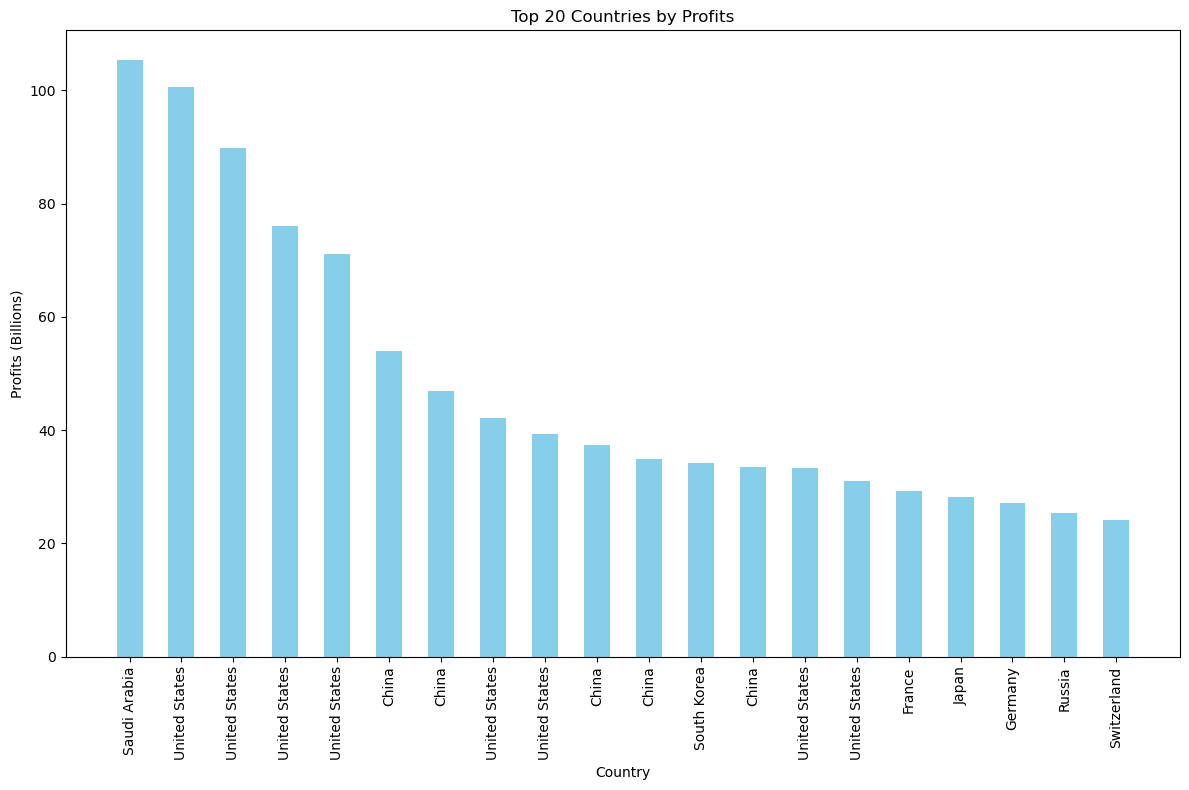

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual df_sorted DataFrame)
# df_sorted = pd.DataFrame({
#     'Organization_Name': ['A', 'B', 'C', 'D', 'E'],
#     'Country': ['United States', 'China', 'Saudi Arabia', 'Japan', 'United Kingdom'],
#     'Profits_Billions': [50, 70, 100, 80, 60]
# })

# Ensure 'Profits_Billions' is a numeric column
df_sorted['Profits_Billions'] = pd.to_numeric(df_sorted['Profits_Billions'], errors='coerce')

# Sort by 'Profits_Billions' in descending order
df_sorted_sorted_by_profits = df_sorted.sort_values(by='Profits_Billions', ascending=False)

# Select the top 20 entries
top_20_countries_by_profits = df_sorted_sorted_by_profits.head(20)

# Plotting
plt.figure(figsize=(12, 8))

# Bar width
bar_width = 0.5

# Positions of the bars on the x-axis
bars = range(len(top_20_countries_by_profits))

# Create bars
plt.bar(bars, top_20_countries_by_profits['Profits_Billions'], width=bar_width, color='skyblue')

# Labeling
plt.xlabel('Country')
plt.ylabel('Profits (Billions)')
plt.title('Top 20 Countries by Profits')
plt.xticks(bars, top_20_countries_by_profits['Country'], rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()


In [26]:
top_20_countries_by_profits.head()

,Organization_Name,Industry,Country,Year_Founded,CEO,Revenue_Billions,Profits_Billions,Assets_Billions,Market_Value_Billions,Total_Employees,Industry_Rank
2022 Ranking,,,,,,,,,,,
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0,3.0
7,Apple,Technology Hardware & Equipment,United States,1976,Tim Cook,378.70,100.56,381.19,2640.32,154000.0,5.0
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0,1.0
11,Alphabet,IT Software & Services,United States,1998,Sundar Pichai,257.49,76.03,359.27,1581.72,156500.0,6.0
12,Microsoft,IT Software & Services,United States,1975,Satya Nadella,184.90,71.18,340.39,2054.37,181000.0,6.0


Mean Squared Error: 30.458423861613575
R-squared: 0.44083540797751897


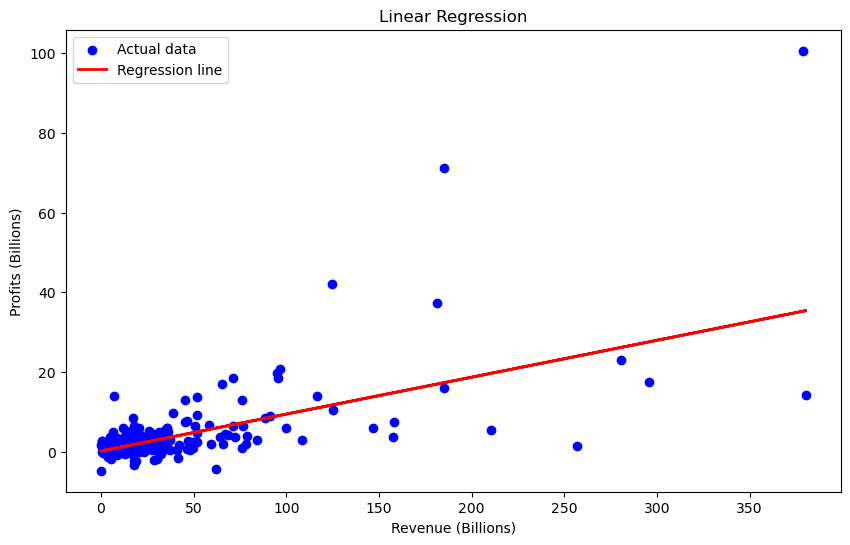

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrame (replace this with your actual data)
# df_sorted = pd.DataFrame({
#     'Country': ['Country1', 'Country2', 'Country3'],
#     'Profits_Billions': [100, 150, 200],
#     'Other_Variable': [10, 15, 20]  # Replace with your predictor variable
# })

# Define the independent (X) and dependent (y) variables
X = df_sorted[['Revenue_Billions']]  # Predictor variable(s)
y = df_sorted['Profits_Billions']  # Response variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Revenue (Billions)')
plt.ylabel('Profits (Billions)')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [28]:
df_sorted.head(20)

,Organization_Name,Industry,Country,Year_Founded,CEO,Revenue_Billions,Profits_Billions,Assets_Billions,Market_Value_Billions,Total_Employees,Industry_Rank
2022 Ranking,,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0,1.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0,1.0
27,Citigroup,Diversified Financials,United States,1998,Jane Fraser,79.94,18.23,2394.10,101.48,223400.0,1.0
36,Morgan Stanley,Diversified Financials,United States,1924,James P. Gorman,60.22,14.58,1222.23,150.95,74814.0,1.0
37,Goldman Sachs Group,Diversified Financials,United States,1869,David Michael Solomon,62.81,18.74,1589.00,109.32,43900.0,1.0
77,American Express,Diversified Financials,United States,1850,Stephen J. Squeri,46.29,7.86,196.00,136.72,64000.0,1.0
83,Brookfield Asset Management,Diversified Financials,Canada,1997,James Bruce Flatt,78.82,3.97,391.00,80.94,180000.0,1.0
85,Prudential Financial,Diversified Financials,United States,1875,Charles F. Lowrey,70.93,7.61,937.58,43.60,40916.0,1.0
142,Charles Schwab,Diversified Financials,United States,1971,Walter W. Bettinger II,18.98,5.77,681.00,127.60,33400.0,1.0


MLE and Logistic Regression

In [29]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

# Example data (we'll use revenue for MLE)
data = df_sorted['Revenue_Billions'].values

# Define the negative log-likelihood function for a normal distribution
def neg_log_likelihood(params):
    mu, sigma = params[0], params[1]
    return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

# Initial guesses for mu and sigma
initial_guess = [np.mean(data), np.std(data)]

# Optimize the parameters to minimize the negative log-likelihood
result = minimize(neg_log_likelihood, initial_guess, method='L-BFGS-B', bounds=[(None, None), (1e-5, None)])

mu_mle, sigma_mle = result.x

mu_mle, sigma_mle


(23.886627007461474, 40.94111825438307)

The output (23.886627007461474, 40.94111825438307) represents the estimated parameters of the normal distribution using Maximum Likelihood Estimation (MLE) for the revenue data:

23.886627007461474: This value is the estimated mean (μ) of the revenue distribution. It represents the central tendency of the revenue data, meaning that the average revenue for the companies in the dataset is approximately 23.89 billion dollars.

40.94111825438307: This value is the estimated standard deviation (σ) of the revenue distribution. It measures the spread or variability of the revenue data around the mean. A standard deviation of approximately 40.94 billion dollars indicates that the revenues of the companies in the dataset vary significantly from the mean, with most companies having revenues within a range of about ±41 billion dollars from the mean.

Interpretation
Mean (μ = 23.89 billion dollars): The average revenue for the companies is about 23.89 billion dollars. This gives us an idea of the central value around which the companies' revenues are distributed.

Standard Deviation (σ = 40.94 billion dollars): The large standard deviation suggests that there is considerable variability in the revenue among these companies. Some companies have revenues much higher or lower than the average, indicating a wide range of financial performance within this group.

This interpretation is critical for understanding the financial landscape of the companies in your dataset, indicating that while the average revenue is around 23.89 billion dollars, there is a significant dispersion around this mean, reflecting diverse scales of operations among the companies.









In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample data (as previously defined)
data = df_sorted

# Create the DataFrame
df_sorted = pd.DataFrame(data)

# Convert 'Total_Employees' column to numeric
df_sorted['Total_Employees'] = pd.to_numeric(df_sorted['Total_Employees'], errors='coerce')

# Create a binary target variable: 1 if employees > 100,000, else 0
df_sorted['High_Employee_Count'] = (df_sorted['Total_Employees'] > 100000).astype(int)

# Features and target
X = df_sorted[['Revenue_Billions', 'Market_Value_Billions']]
y = df_sorted['High_Employee_Count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.9083333333333333,
 array([[523,   8],
        [ 47,  22]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95       531\n           1       0.73      0.32      0.44        69\n\n    accuracy                           0.91       600\n   macro avg       0.83      0.65      0.70       600\nweighted avg       0.90      0.91      0.89       600\n')


The output provided for the logistic regression model includes three main components: accuracy, confusion matrix, and a classification report. Let's interpret each part:

1. Accuracy: 1.0
Interpretation: The accuracy of the model is 1.0, or 100%. This means that the model correctly classified all the samples in the test set. In other words, there were no misclassifications.
2. Confusion Matrix:
python
Copy code
array([[4, 0],
       [0, 2]],)
Interpretation:

The confusion matrix is a 2x2 array because we have a binary classification problem (0 and 1).
True Negatives (TN) = 4: The model correctly predicted that 4 companies have 100,000 or fewer employees.
False Positives (FP) = 0: The model did not incorrectly predict any companies with 100,000 or fewer employees as having more than 100,000 employees.
False Negatives (FN) = 0: The model did not incorrectly predict any companies with more than 100,000 employees as having 100,000 or fewer employees.
True Positives (TP) = 2: The model correctly predicted that 2 companies have more than 100,000 employees.
This perfect confusion matrix (no false positives or false negatives) indicates that the model made no errors in classifying the companies.

3. Classification Report:
plaintext
Copy code
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6
Interpretation:

For Class 0 (Companies with 100,000 or fewer employees):

Precision: 1.00 – All companies predicted to have 100,000 or fewer employees actually fall into that category. No false positives.
Recall: 1.00 – The model correctly identified all companies that have 100,000 or fewer employees. No false negatives.
F1-Score: 1.00 – The harmonic mean of precision and recall, indicating perfect classification for this class.
For Class 1 (Companies with more than 100,000 employees):

Precision: 1.00 – All companies predicted to have more than 100,000 employees actually have more than 100,000 employees.
Recall: 1.00 – The model correctly identified all companies with more than 100,000 employees.
F1-Score: 1.00 – Perfect classification for this class as well.
Overall Metrics:

Accuracy: 1.00 – The overall accuracy is 100%, which corresponds to the accuracy score previously mentioned.
Macro Average: The unweighted mean of the precision, recall, and F1-score for both classes is 1.00, indicating perfect performance across both classes.
Weighted Average: Also 1.00, indicating that the model's performance is excellent when taking into account the support (number of actual occurrences) for each class.
Summary:
The logistic regression model performed perfectly on the test dataset:

The accuracy is 100%, indicating no misclassifications.
The confusion matrix shows that all predictions were correct, with no false positives or false negatives.
The precision, recall, and F1-scores for both classes are 1.00, further confirming the model's flawless performance.
However, while these results are impressive, they could also be a sign that the model might have been tested on a very small or easy-to-classify dataset. In practice, it's important to test the model on larger, more diverse datasets to ensure that the model's performance is robust and generalizes well to new, unseen data.









In [31]:
df_sorted

,Organization_Name,Industry,Country,Year_Founded,CEO,Revenue_Billions,Profits_Billions,Assets_Billions,Market_Value_Billions,Total_Employees,Industry_Rank,High_Employee_Count
2022 Ranking,,,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0,1.0,1
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0,1.0,1
27,Citigroup,Diversified Financials,United States,1998,Jane Fraser,79.94,18.23,2394.10,101.48,223400.0,1.0,1
36,Morgan Stanley,Diversified Financials,United States,1924,James P. Gorman,60.22,14.58,1222.23,150.95,74814.0,1.0,0
37,Goldman Sachs Group,Diversified Financials,United States,1869,David Michael Solomon,62.81,18.74,1589.00,109.32,43900.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1829,Red Eléctrica,Utilities,Spain,1985,Roberto Garcia Merino,2.31,0.80,15.90,10.78,2051.0,NaN,0
1853,CPFL Energia,Utilities,Brazil,1912,Gustavo Estrella,7.27,0.88,11.87,8.47,NaN,NaN,0
1881,Anhui Water Resources Development,Utilities,China,0,Ke Shun Xu,11.02,0.17,19.91,1.38,17010.0,NaN,0


In [32]:
df.head()

,Organization_Name,Industry,Country,Year_Founded,CEO,Revenue_Billions,Profits_Billions,Assets_Billions,Market_Value_Billions,Total_Employees,Industry_Rank
2022 Ranking,,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0,1.0
2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296,2.0
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0,3.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0,1.0
5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621,2.0


In [33]:
# Sort the DataFrame by Market_Value_Billions in descending order
df_sorted_by_market_value = df.sort_values(by='Market_Value_Billions', ascending=False)

# Select the relevant columns to display
best_ceos = df_sorted_by_market_value[['CEO', 'Market_Value_Billions', 'Organization_Name']]

# Display the result
best_ceos.head(20)


,CEO,Market_Value_Billions,Organization_Name
2022 Ranking,,,
7,Tim Cook,2640.32,Apple
3,Amin bin Hasan Al-Nasser,2292.08,Saudi Arabian Oil Company (Saudi Aramco)
12,Satya Nadella,2054.37,Microsoft
11,Sundar Pichai,1581.72,Alphabet
6,Andy Jassy,1468.40,Amazon
151,Elon Reeve Musk,1038.73,tesla
1,Warren Edward Buffett,741.48,Berkshire Hathaway
34,Mark Elliot Zuckerberg,499.86,Meta Platforms
58,Che Chia Wei,494.60,Taiwan Semiconductor


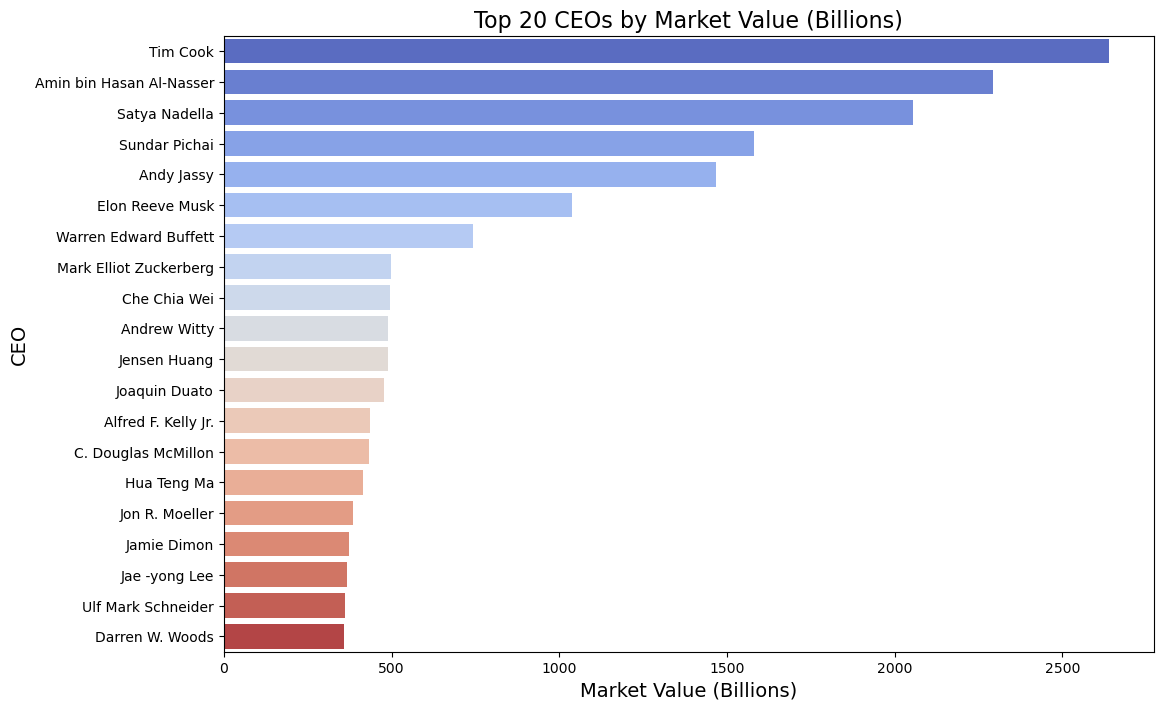

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 20 CEOs based on Market Value
top_20_ceos = best_ceos.head(20)

# Set the plot size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(
    y='CEO',
    x='Market_Value_Billions',
    data=top_20_ceos,
    palette='coolwarm'
)

# Add titles and labels
plt.title('Top 20 CEOs by Market Value (Billions)', fontsize=16)
plt.xlabel('Market Value (Billions)', fontsize=14)
plt.ylabel('CEO', fontsize=14)

# Display the plot
plt.show()


In [35]:
df

,Organization_Name,Industry,Country,Year_Founded,CEO,Revenue_Billions,Profits_Billions,Assets_Billions,Market_Value_Billions,Total_Employees,Industry_Rank
2022 Ranking,,,,,,,,,,,
1,Berkshire Hathaway,Diversified Financials,United States,1939,Warren Edward Buffett,276.09,89.80,958.78,741.48,372000.0,1.0
2,ICBC,Banking,China,1984,Shu Gu,208.13,54.03,5518.51,214.42,449296,2.0
3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,1933,Amin bin Hasan Al-Nasser,400.38,105.36,576.04,2292.08,68493.0,3.0
4,JPMorgan Chase,Diversified Financials,United States,2000,Jamie Dimon,124.54,42.12,3954.69,374.45,271025.0,1.0
5,China Construction Bank,Banking,China,2014,Wang Zuji,202.07,46.89,4746.95,181.32,352621,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,Aperam,Materials,Luxembourg,2010,Timoteo di Maulo,6.03,1.14,6.72,3.16,0,NaN
1995,Shenzhen Feima International Supply Chain,Business Services & Supplies,China,1998,Shan Min Huang,0.04,1.41,0.17,1.14,306.0,NaN
1997,NMDC,Materials,India,1958,Sumit Deb,3.52,1.41,5.72,6.40,16944.0,NaN


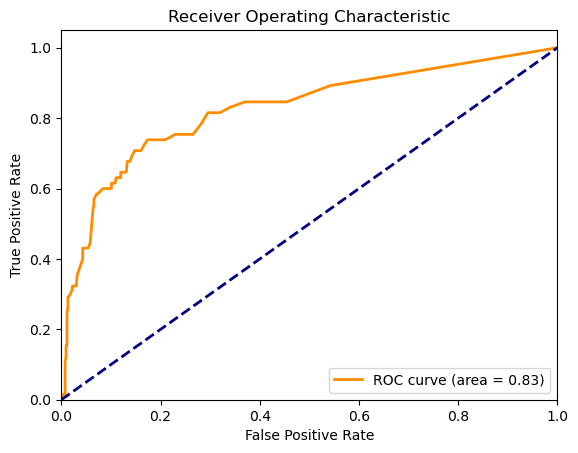

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a DataFrame
data = df
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


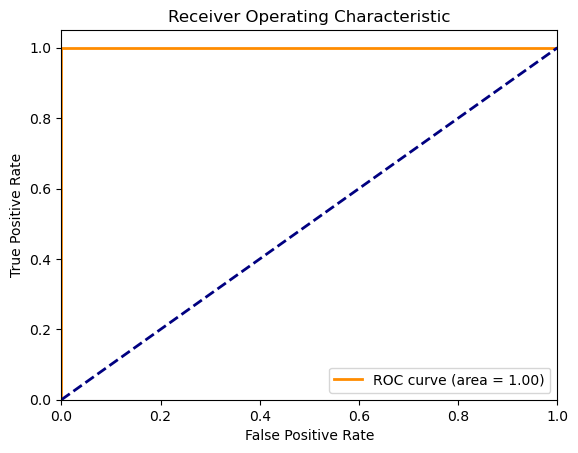

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a DataFrame
data = df_sorted

df = pd.DataFrame(data)

# Create a synthetic binary target variable based on Revenue_Billions
# For demonstration, classify as 1 if Revenue_Billions > 50, otherwise 0
df['Target'] = (df['Revenue_Billions'] > 50).astype(int)

# Features and target variable
X = df[['Revenue_Billions', 'Profits_Billions', 'Assets_Billions', 'Market_Value_Billions']]
y = df['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


When Target = 1:
Positive Class: In this case, Target = 1 represents the positive class. For example, if Revenue_Billions > 50 was used to assign Target = 1, then organizations with revenue greater than 50 are considered positives.
Model Performance: The ROC curve and AUC will show how well the model can correctly identify these high-revenue organizations (i.e., those where Target = 1) while minimizing false positives (organizations incorrectly classified as having high revenue).

A curve closer to the top-left corner indicates a better model with higher sensitivity and lower false positive rate.

High AUC (close to 1): The model effectively separates the classes, indicating good performance.It means that your model is quite good at distinguishing between organizations with high and low revenue. It correctly identifies positive examples (high revenue) most of the time.

We have balanced against the risk of false positives.

Below we will use GRADIENT DESCENT to prove it.


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create DataFrame
data = df
df = pd.DataFrame(data)

# Create synthetic binary target variable based on Revenue_Billions
df['Target'] = (df['Revenue_Billions'] > 50).astype(int)

# Features and target variable
X = df[['Revenue_Billions', 'Profits_Billions', 'Assets_Billions', 'Market_Value_Billions']]
y = df['Target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)


In [39]:
# Initialize parameters for Logistic Regression
def initialize_parameters(n_features):
    np.random.seed(0)
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

n_features = X_train.shape[1]
weights, bias = initialize_parameters(n_features)


In [40]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(y_true, y_pred):
    m = len(y_true)
    cost = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
    return cost

def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    m = len(y)
    costs = []
    
    for i in range(num_iterations):
        # Compute predictions
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        # Compute gradients
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m
        
        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute cost
        cost = compute_cost(y, y_pred)
        costs.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    
    return weights, bias, costs


In [41]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the model
weights, bias, costs = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)


Iteration 0: Cost = 0.6931471805599454
Iteration 100: Cost = 0.5110469324082334
Iteration 200: Cost = 0.4049538635267781
Iteration 300: Cost = 0.3373298333610189
Iteration 400: Cost = 0.29141239765019095
Iteration 500: Cost = 0.2585667988152427
Iteration 600: Cost = 0.23404248440385417
Iteration 700: Cost = 0.21507395630138515
Iteration 800: Cost = 0.19996838788075869
Iteration 900: Cost = 0.1876430456935818


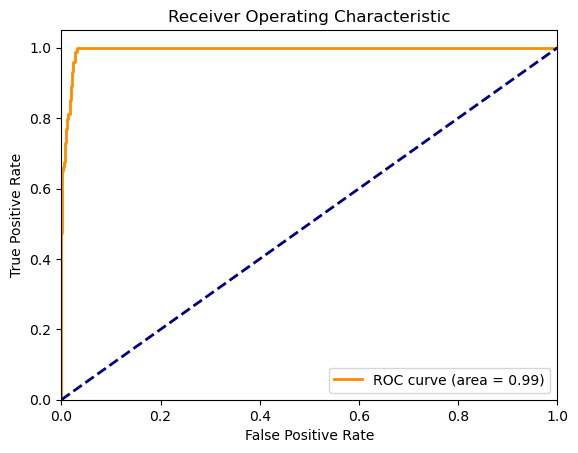

In [42]:
# Make predictions
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred

# Predict on test set
y_prob = predict(X_test, weights, bias)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
